#### Import necessary packages

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#### Read the csv file into a pandas dataframe

In [74]:
df_with_target = pd.read_csv('data/all_data.csv')
df_with_target.head()

,Unnamed: 0,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CREDIT_TYPE_Rare_MEAN,CREDIT_TYPE_Consumer credit_SUM,CREDIT_TYPE_Consumer credit_MEAN,CREDIT_TYPE_Credit card_SUM,CREDIT_TYPE_Credit card_MEAN,MONTHS_CREDIT_COUNT,MONTHS_CREDIT_SUM,MONTHS_CREDIT_MEAN,MONTHS_CREDIT_MAX,MONTHS_CREDIT_MIN
0,0,100002,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.0,4.0,0.5,4.0,0.5,6.0,144.0,24.00,61.0,3.0
1,1,100003,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,2.0,0.5,2.0,0.5,4.0,115.0,28.75,61.0,5.0
2,2,100004,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,2.0,1.0,0.0,0.0,2.0,25.0,12.50,24.0,1.0
3,3,100006,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100007,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,1.0,1.0,0.0,0.0,1.0,12.0,12.00,12.0,12.0


#### Drop the TARGET and SK_ID_CURR

In [75]:
target = df_with_target['TARGET']
df_without_target = df_with_target.drop(['TARGET', 'SK_ID_CURR'], axis=1)
df_without_target.head()

,Unnamed: 0,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,CREDIT_TYPE_Rare_MEAN,CREDIT_TYPE_Consumer credit_SUM,CREDIT_TYPE_Consumer credit_MEAN,CREDIT_TYPE_Credit card_SUM,CREDIT_TYPE_Credit card_MEAN,MONTHS_CREDIT_COUNT,MONTHS_CREDIT_SUM,MONTHS_CREDIT_MEAN,MONTHS_CREDIT_MAX,MONTHS_CREDIT_MIN
0,0,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0.0,4.0,0.5,4.0,0.5,6.0,144.0,24.00,61.0,3.0
1,1,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,2.0,0.5,2.0,0.5,4.0,115.0,28.75,61.0,5.0
2,2,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,2.0,1.0,0.0,0.0,2.0,25.0,12.50,24.0,1.0
3,3,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,1.0,1.0,0.0,0.0,1.0,12.0,12.00,12.0,12.0


#### Seperate into Categorical and Numerical features

In [76]:
df_without_target.dtypes.unique().tolist()

[dtype('int64'), dtype('O'), dtype('float64')]

In [77]:
numerical_features = df_without_target.select_dtypes(include=['float64', 'int64'])
numerical_features.head()

,Unnamed: 0,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,CREDIT_TYPE_Rare_MEAN,CREDIT_TYPE_Consumer credit_SUM,CREDIT_TYPE_Consumer credit_MEAN,CREDIT_TYPE_Credit card_SUM,CREDIT_TYPE_Credit card_MEAN,MONTHS_CREDIT_COUNT,MONTHS_CREDIT_SUM,MONTHS_CREDIT_MEAN,MONTHS_CREDIT_MAX,MONTHS_CREDIT_MIN
0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,...,0.0,4.0,0.5,4.0,0.5,6.0,144.0,24.00,61.0,3.0
1,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,...,0.0,2.0,0.5,2.0,0.5,4.0,115.0,28.75,61.0,5.0
2,2,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,...,0.0,2.0,1.0,0.0,0.0,2.0,25.0,12.50,24.0,1.0
3,3,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,...,0.0,1.0,1.0,0.0,0.0,1.0,12.0,12.00,12.0,12.0


In [78]:
categorical_features = df_without_target.select_dtypes(include=['object'])
# categorical_features = categorical_features[mask]
categorical_features.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business,No
1,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,No
2,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN
3,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business,NaN
4,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN


#### Concatenate final result

In [81]:
df_col_cleaned = pd.concat([categorical_features, numerical_features, target], axis=1)
df_col_cleaned.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,...,CREDIT_TYPE_Consumer credit_SUM,CREDIT_TYPE_Consumer credit_MEAN,CREDIT_TYPE_Credit card_SUM,CREDIT_TYPE_Credit card_MEAN,MONTHS_CREDIT_COUNT,MONTHS_CREDIT_SUM,MONTHS_CREDIT_MEAN,MONTHS_CREDIT_MAX,MONTHS_CREDIT_MIN,TARGET
0,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,...,4.0,0.5,4.0,0.5,6.0,144.0,24.00,61.0,3.0,1
1,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,...,2.0,0.5,2.0,0.5,4.0,115.0,28.75,61.0,5.0,0
2,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,...,2.0,1.0,0.0,0.0,2.0,25.0,12.50,24.0,1.0,0
3,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,...,1.0,1.0,0.0,0.0,1.0,12.0,12.00,12.0,12.0,0


#### No need to remove rows which has nulls for each feature

In [82]:
df_col_cleaned.isna().sum(axis=1).max()

81

#### Final row & columns cleaned by removing inappropriate columns and rows

In [83]:
df_row_col_cleaned = df_col_cleaned
df_row_col_cleaned.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,...,CREDIT_TYPE_Consumer credit_SUM,CREDIT_TYPE_Consumer credit_MEAN,CREDIT_TYPE_Credit card_SUM,CREDIT_TYPE_Credit card_MEAN,MONTHS_CREDIT_COUNT,MONTHS_CREDIT_SUM,MONTHS_CREDIT_MEAN,MONTHS_CREDIT_MAX,MONTHS_CREDIT_MIN,TARGET
0,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,...,4.0,0.5,4.0,0.5,6.0,144.0,24.00,61.0,3.0,1
1,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,...,2.0,0.5,2.0,0.5,4.0,115.0,28.75,61.0,5.0,0
2,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,...,2.0,1.0,0.0,0.0,2.0,25.0,12.50,24.0,1.0,0
3,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,...,1.0,1.0,0.0,0.0,1.0,12.0,12.00,12.0,12.0,0


#### Correlation Matrix

<Axes: >

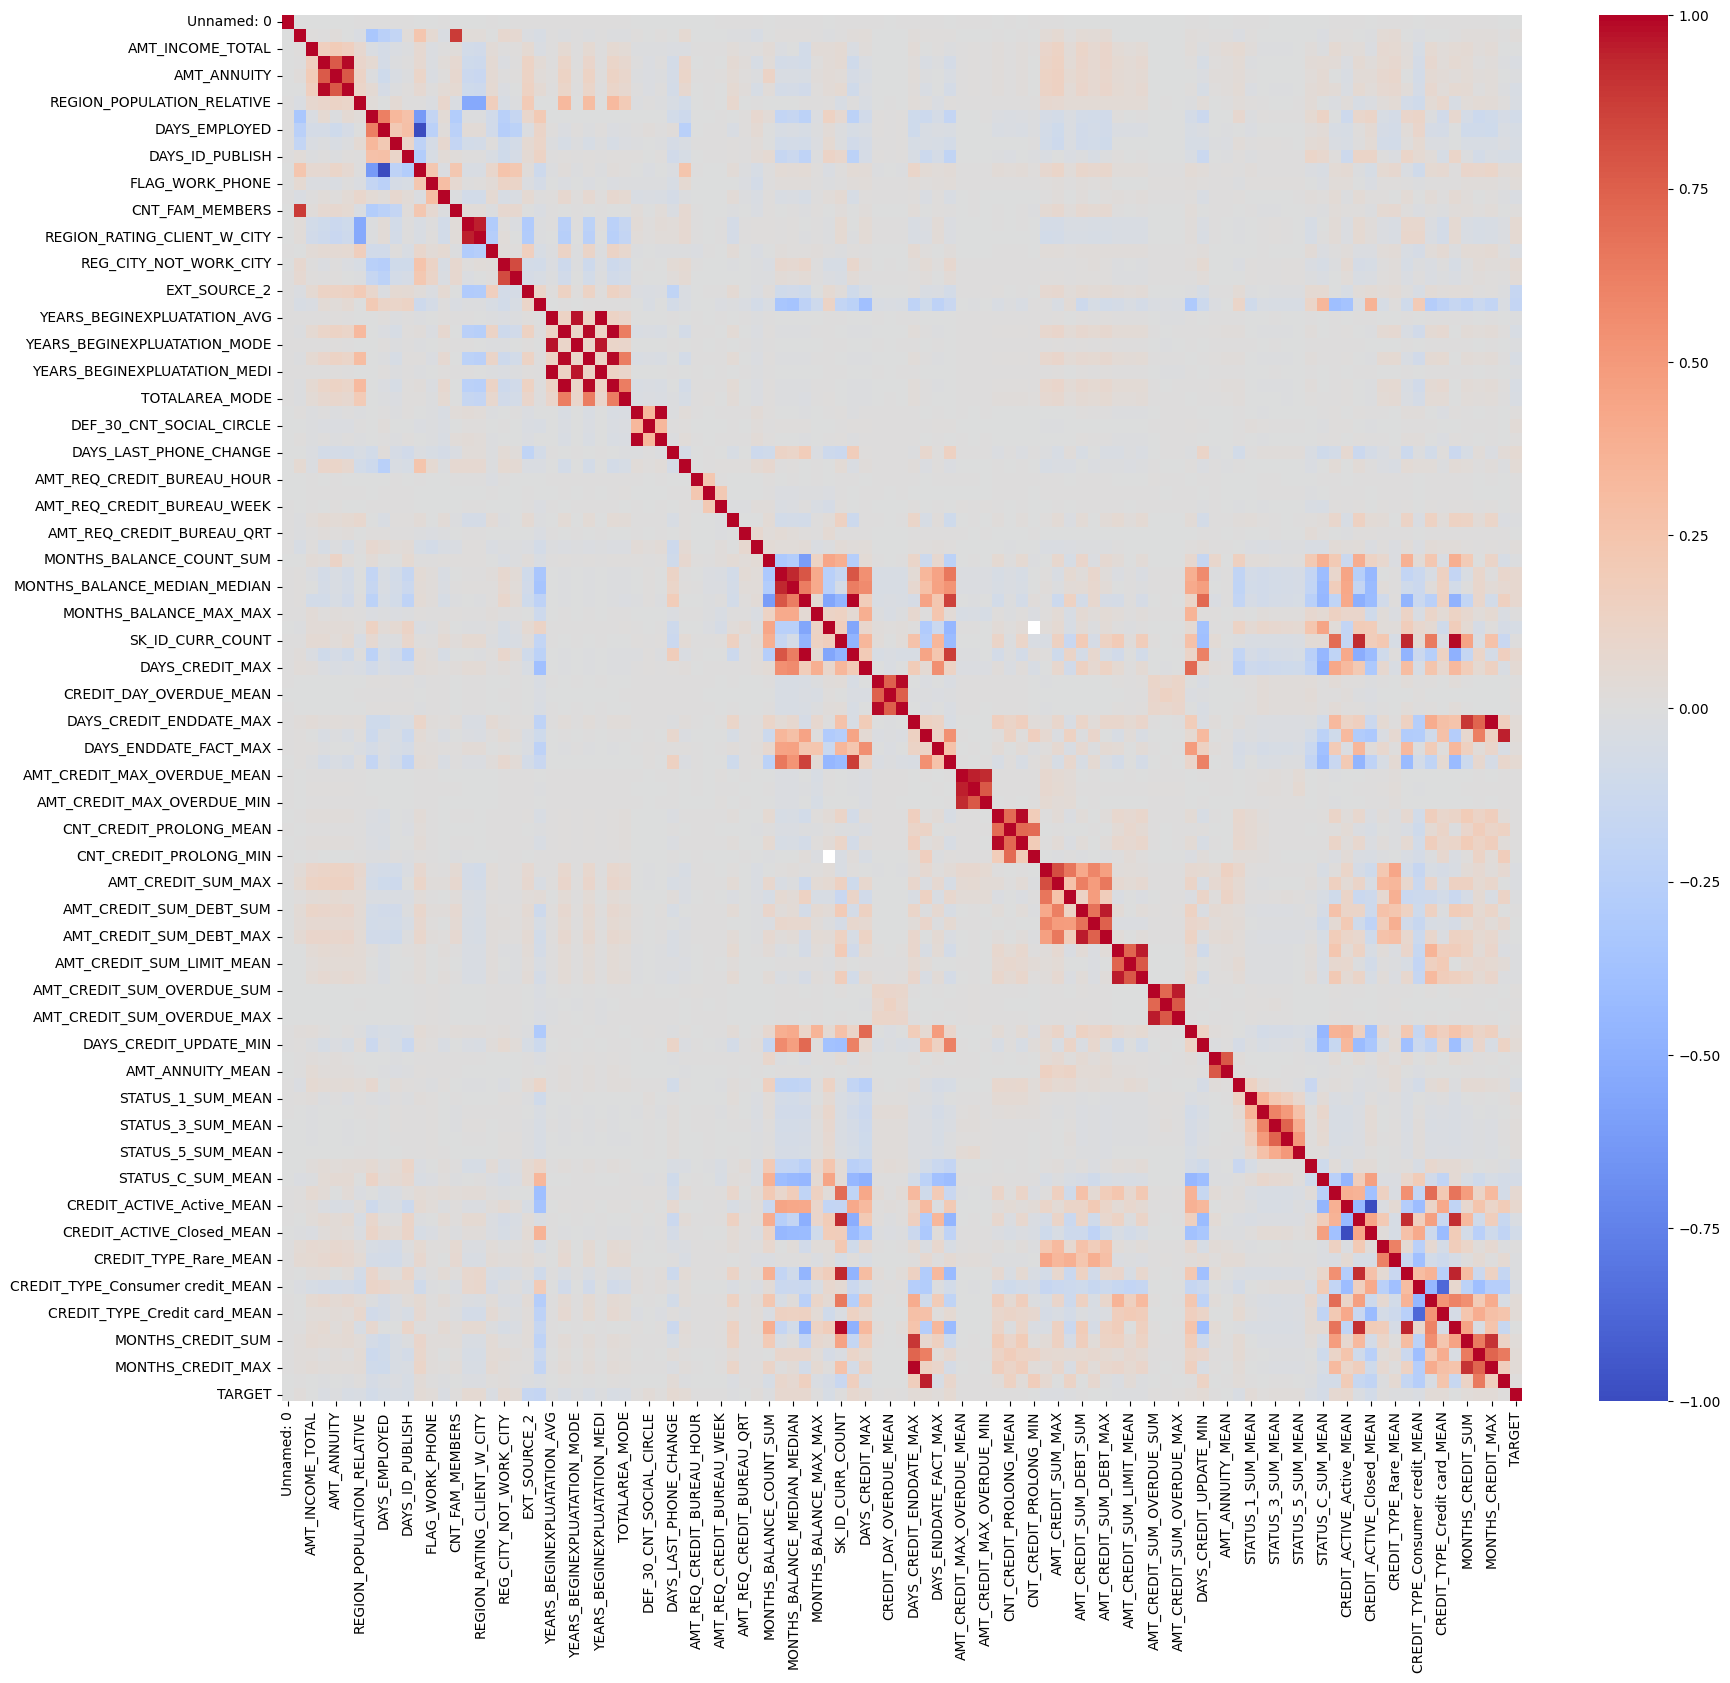

In [84]:
import seaborn as sns

numerical_data = df_row_col_cleaned.select_dtypes(include=['float64', 'int64'])
df = numerical_data.drop("TARGET", axis=1)
corrilation_matrix = numerical_data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corrilation_matrix, annot=False, cmap='coolwarm', center=0)

#### Use Correlations and Drop some features based on correlations

In [85]:
df_correlation_removed = df_row_col_cleaned

#### Remove outliers

#### Test Train Split

In [86]:
X = df_correlation_removed.drop('TARGET', axis=1)
y = df_correlation_removed['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(246008, 114)
(61503, 114)
(246008,)
(61503,)


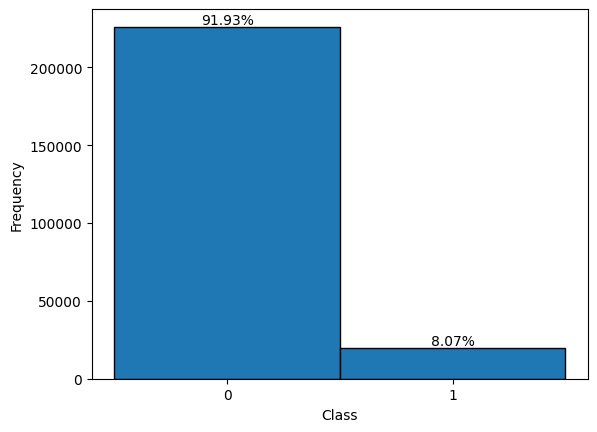

In [108]:
# Calculate the frequency and percentage of each class
class_counts = np.bincount(y_train)
total_count = len(y_train)
percentages = class_counts / total_count * 100

# Plot the histogram
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')

# Annotate each bar with the percentage
for i, count in enumerate(class_counts):
    plt.text(i, count, f'{percentages[i]:.2f}%', ha='center', va='bottom')

plt.show()

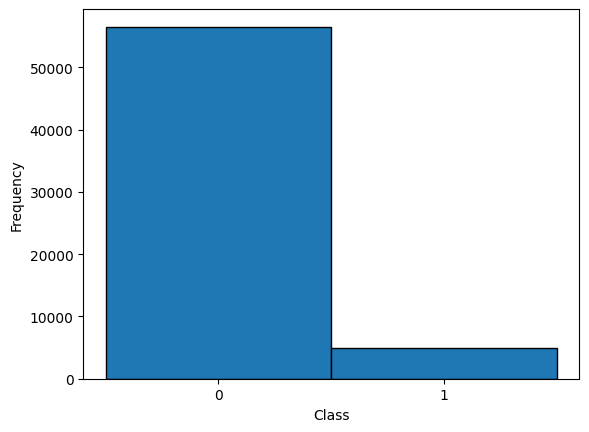

In [88]:
plt.hist(y_test, bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#### Apply Imputation Techniques

##### Median Imputing

In [89]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy='most_frequent')
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
X_train[categorical_features] = mode_imputer.fit_transform(X_train[categorical_features])
X_test[categorical_features] = mode_imputer.transform(X_test[categorical_features])

##### Mean Imputing

In [90]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
X_train[numerical_features] = mean_imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = mean_imputer.transform(X_test[numerical_features])

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(246008, 114)
(61503, 114)
(246008,)
(61503,)


#### Encoding

##### Replacing with 1s and 0s

From Pandas Profiling Report I have found following features can be replaced with binary 0s and 1s

In [92]:
def encode_bin(X):
    pd.set_option("future.no_silent_downcasting", True)
    
    X['FLAG_OWN_CAR'] = X['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})
    X['FLAG_OWN_CAR'] = X['FLAG_OWN_CAR'].astype('float64')
    # print(X['FLAG_OWN_CAR'].head(3))
    
    X['FLAG_OWN_REALTY'] = X['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0}) 
    X['FLAG_OWN_REALTY'] = X['FLAG_OWN_REALTY'].astype('float64')
    # print(X['FLAG_OWN_REALTY'].head(3))
    
    X['EMERGENCYSTATE_MODE'] = X['EMERGENCYSTATE_MODE'].replace({'Yes': 1, 'No': 0})
    X['EMERGENCYSTATE_MODE'] = X['EMERGENCYSTATE_MODE'].astype('float64')
    # print(X_train['EMERGENCYSTATE_MODE'].head(3))
    return X

In [93]:
X_train = encode_bin(X_train)
X_test = encode_bin(X_test)

In [94]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(246008, 114)
(61503, 114)
(246008,)
(61503,)


##### one-hot encoding

In [95]:
ohe = OneHotEncoder()
encodded = ohe.fit_transform(X_train[categorical_features])

X_encd = encodded.toarray()
X_train = X_train.drop(categorical_features, axis=1)
X_train = np.array(X_train)

X_train = np.append(X_train, X_encd, axis=1)

In [96]:
X_train.shape

(246008, 209)

In [97]:
encodded = ohe.transform(X_test[categorical_features])

y_encd = encodded.toarray()
X_test = X_test.drop(categorical_features, axis=1)
X_test = np.array(X_test)

X_test = np.append(X_test, y_encd, axis=1)

In [98]:
X_test.shape

(61503, 209)

#### Over/Under sampling

In [99]:
# from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTEENN

# smote_enn = SMOTEENN(random_state=42, sampling_strategy=1.0)
# X_train, y_train = smote_enn.fit_resample(X_train, y_train)

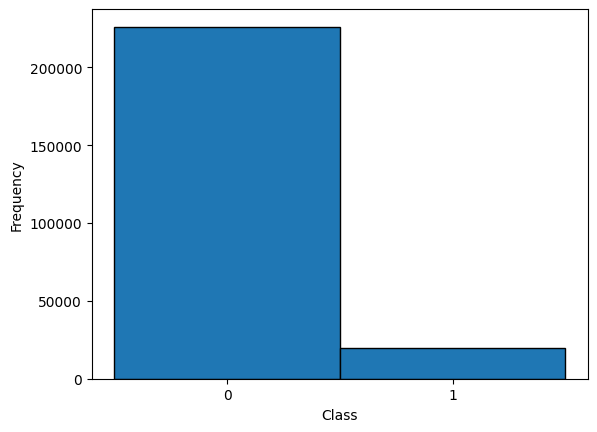

In [100]:
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#### Training XGBoost Classifier Model

In [101]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Prepare data
X_train_selected = np.array(X_train)
X_test_selected = np.array(X_test)

stdscl = StandardScaler()
X_train_selected = stdscl.fit_transform(X_train_selected)
X_test_selected = stdscl.transform(X_test_selected)

counter = Counter(y_train)
majority_class_count = counter[0]
minority_class_count = counter[1]

print(f'majority_class_count = {majority_class_count}\nminority_class_count = {minority_class_count}\n')

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_selected)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

majority_class_count = 226148
minority_class_count = 19860

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.46      0.04      0.07      4965

    accuracy                           0.92     61503
   macro avg       0.69      0.52      0.51     61503
weighted avg       0.88      0.92      0.89     61503



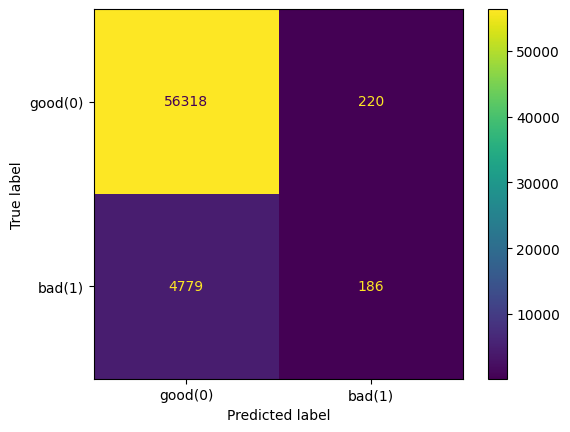

In [109]:
disp = ConfusionMatrixDisplay(cm, display_labels=['good(0)', 'bad(1)'])
disp.plot()

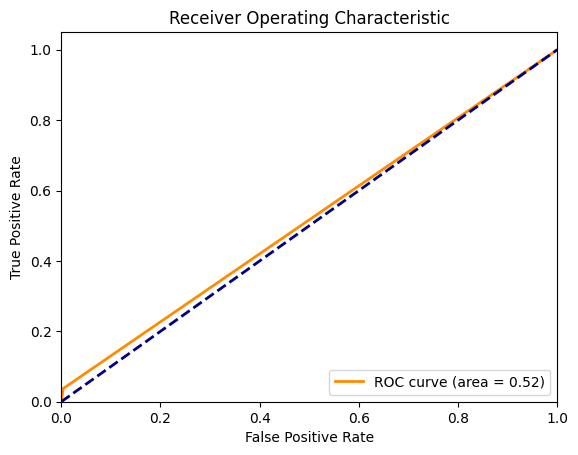

In [103]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Step 5: Calculate AUC
roc_auc = auc(fpr, tpr)

# Step 6: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

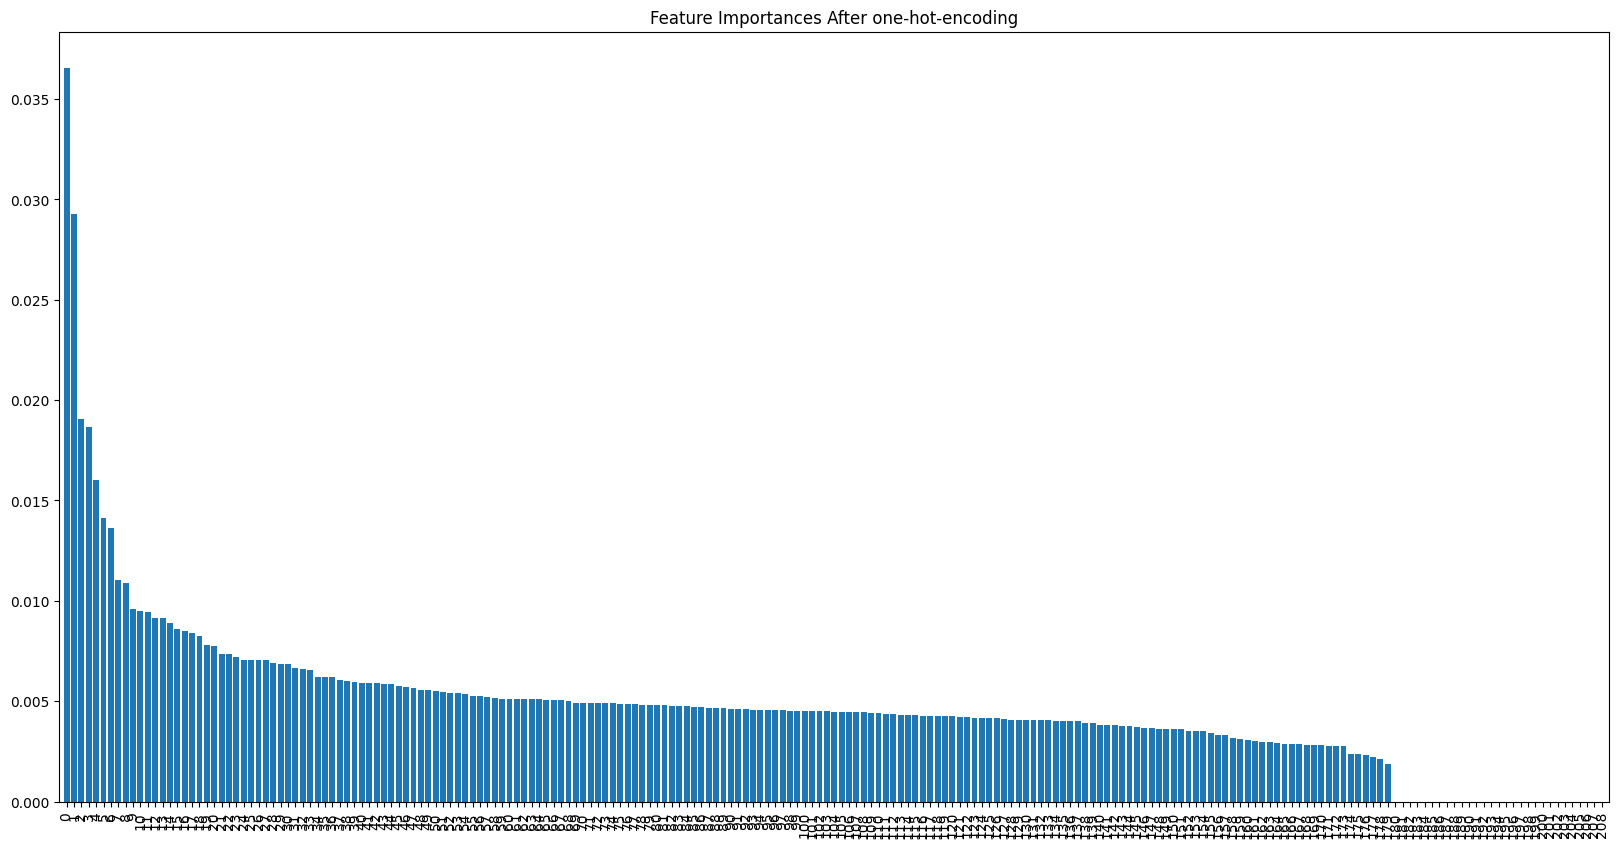

In [104]:
# feature_names = df_correlation_removed.columns
# Get feature importances
importances = model.feature_importances_
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
# Plot the feature importances
plt.figure(figsize=(20, 10))
plt.title("Feature Importances After one-hot-encoding")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

#### AFter considering only important features

In [105]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from collections import Counter

X_train_selected = X_train_selected[:, indices]
X_test_selected = X_test_selected[:, indices]

counter = Counter(y_train)
majority_class_count = counter[0]
minority_class_count = counter[1]

print(f'majority_class_count = {majority_class_count}\nminority_class_count = {minority_class_count}\n')

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_selected)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

majority_class_count = 226148
minority_class_count = 19860

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.46      0.04      0.07      4965

    accuracy                           0.92     61503
   macro avg       0.69      0.52      0.51     61503
weighted avg       0.88      0.92      0.89     61503



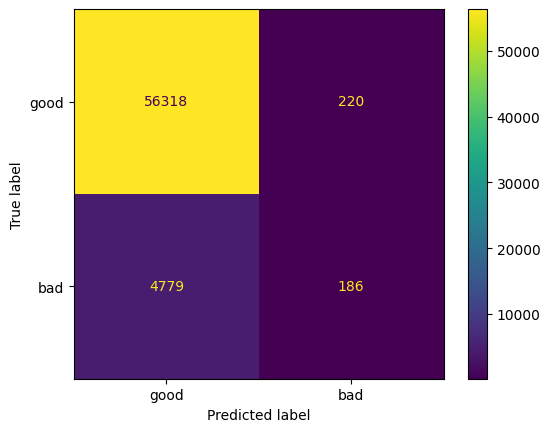

In [106]:
disp = ConfusionMatrixDisplay(cm, display_labels=['good', 'bad'])
disp.plot()

##### Result is same as before

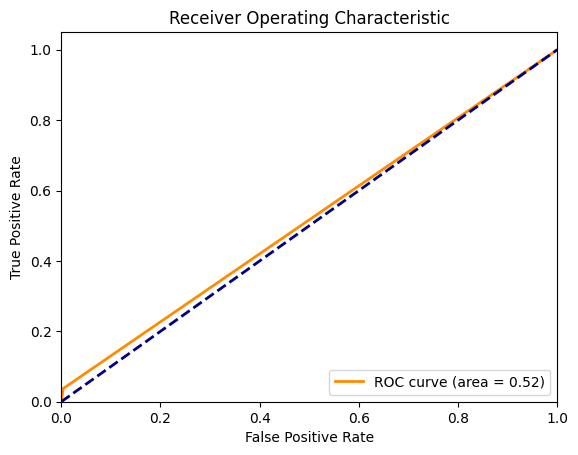

In [107]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Step 5: Calculate AUC
roc_auc = auc(fpr, tpr)

# Step 6: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()